# Perkenalan
- - -
1. Project Overview
2. Authors and Creators

Project Overview
- - -
Projek ini menggunakan Uber and Lyft Dataset, dataset dapat dilihat melalui link berikut [di sini (data uber vs lyft)](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). Dataset yang digunakan pada projek ini sesuai jika model yang akan digunakan adalah Linear Regression. Dikarenakan algoritma Linear Regression dapat memprediksi angka berdasarkan data yang ada sebelumnya seperti tujuan projek ini yang akan memprediksi harga perjalanan. Pada database ini mempunyai 57 atribut, tetapi yang relevan ada 10 atribut dari semuanya.

Authors and Creators
- - -
1. Joesoef Septadi Wijaya
2. Ima Nur Firda Alma'ida
3. Intan Amelia

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import kstest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from IPython.display import display, Math

%matplotlib inline

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DatasetH8/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


# Data Cleaning

## Checking the NAN Values 

In [ ]:
#Mengecek Missing Values pada Dataset
missingvalues = pd.DataFrame(df.isnull().sum(),columns=['Number Of Null'])
missingvalues['Percentage'] = missingvalues['Number Of Null']/df.shape[0]*100
missingvalues

,Number Of Null,Percentage
id,0,0.000000
timestamp,0,0.000000
hour,0,0.000000
day,0,0.000000
month,0,0.000000
datetime,0,0.000000
timezone,0,0.000000
source,0,0.000000
destination,0,0.000000
cab_type,0,0.000000


Dapat dilihat bahwa proporsi missing values pada data cukup besar, yaitu sekitar 8%. Umumnya, tidak disarankan untuk membuang missing values tersebut karena dapat menyebabkan bias pada analisis dan model nantinya. Ini juga dapat mengurangi tingkat kepercayaan dari uji statistik yang digunakan. Lebih disarankan untuk menggunakan metode imputasi untuk mengisi missing values pada dataset. 

Secara umum, imputasi regresi bisa menjadi pilihan yang baik jika ada variabel lain dalam kumpulan data yang berkorelasi dengan variabel dependen dan dapat digunakan untuk memprediksi nilai yang hilang. Di sisi lain, imputasi mean atau median dapat digunakan jika data terdistribusi normal dan nilai yang hilang hilang secara acak.

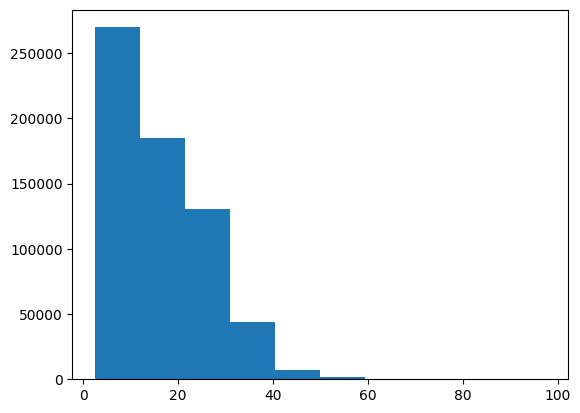

In [ ]:
plt.hist(df['price'].dropna(), bins=10)
plt.show()

In [ ]:
df_drop = df.dropna(subset=['price'])

# Conduct KS test on the variable
ks_statistic, p_value = kstest(df_drop['price'], 'norm')

# Print the results
print('KS statistic:', ks_statistic)
print('P-value:', p_value)


KS statistic: 0.9983193685238516
P-value: 0.0


Dapat dilihat dari histogram bahwa data tersebut tidak berdistribusi normal sehingga mean dan median imputation tidak disarankan untuk digunakan. Diperkuat dengan menggunakan uji kolmogorov smirnoff yang menunjukan hasil p-value dibawah 0.05 sehingga menolak hipotesis 0 yang berarti data tersebut tidak berdistribusi normal.

In [ ]:
pd.DataFrame(pd.unique(df['name']),columns=['Name Of Ride'])

,Name Of Ride
0,Shared
1,Lux
2,Lyft
3,Lux Black XL
4,Lyft XL
5,Lux Black
6,UberXL
7,Black
8,UberX
9,WAV


In [ ]:
pd.DataFrame(pd.unique(df['cab_type']),columns=['Companies'])

,Companies
0,Lyft
1,Uber


# Data Visualization

0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
693066      Night
693067      Night
693068      Night
693069      Night
693070      Night
Name: hour, Length: 693071, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

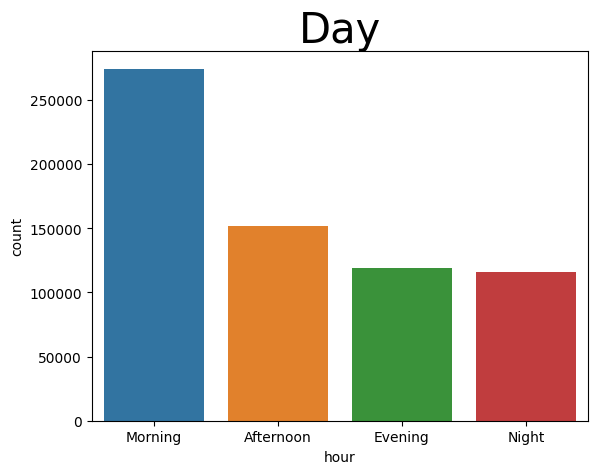

In [ ]:
day=pd.cut(x=df['hour'],bins=[0,10,15,19,23],labels = ['Morning','Afternoon','Evening','Night'])
plt.title('Day',fontsize=30)
sns.countplot(x=day)
day

0     32413
23    31931
16    30384
17    30384
12    30384
13    30384
18    30384
11    30384
14    30384
10    30384
15    30383
22    29436
9     28971
2     28548
1     28548
4     28330
3     27815
21    27732
19    27555
6     27336
20    26782
5     25008
7     24936
8     24275
Name: hour, dtype: int64

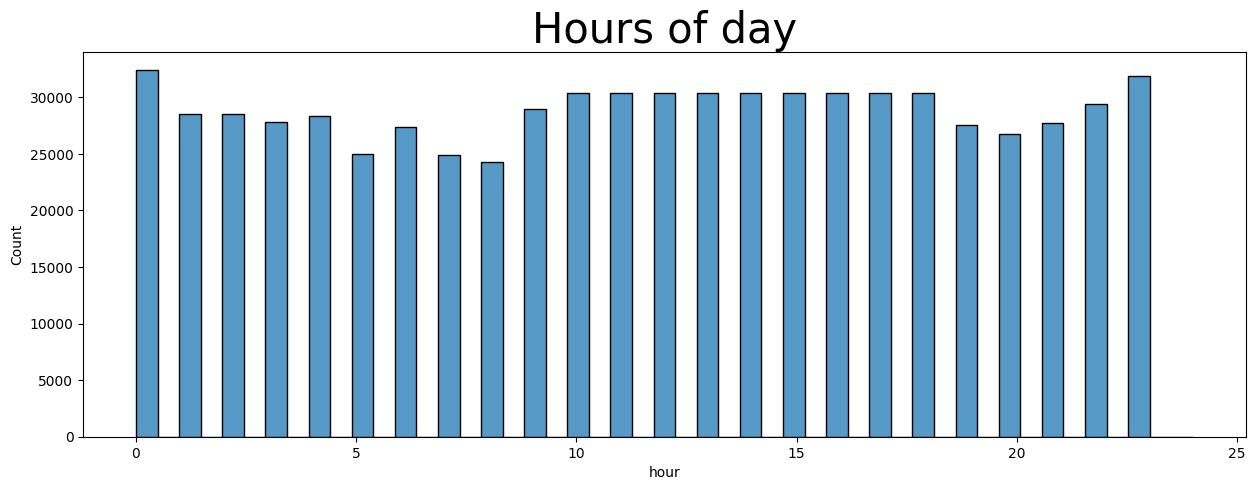

In [ ]:
bins = np.linspace(0,24)
count=df['hour'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Hours of day',fontsize=30)
sns.histplot(x='hour',data=df,bins=bins)
count

27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: day, dtype: int64

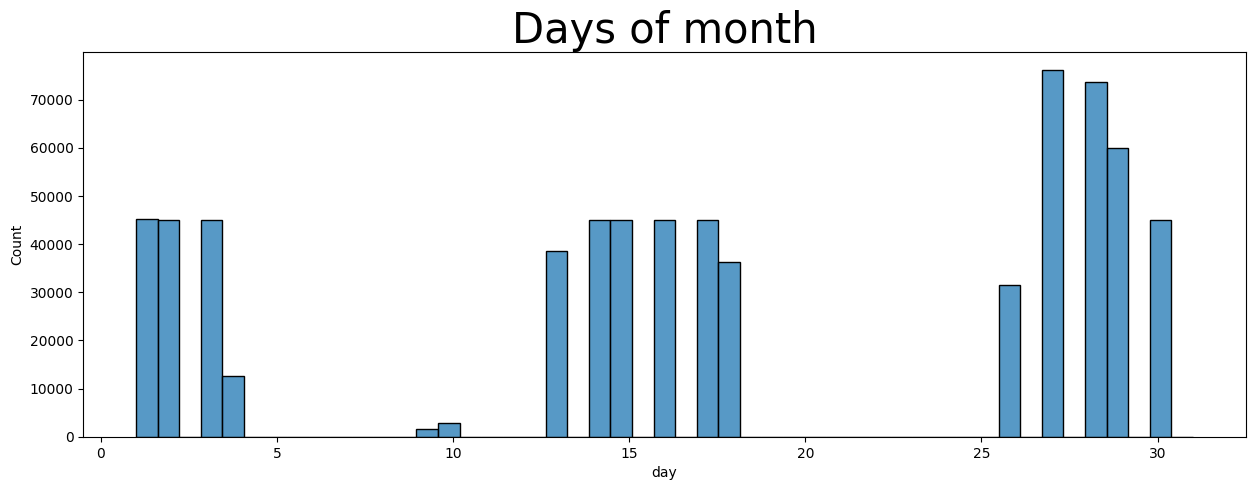

In [ ]:
bins = np.linspace(1,31)
count=df['day'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Days of month',fontsize=30)
sns.histplot(x='day',data=df,bins=bins)
count

Kami akan membuang beberapa variabel yang tidak memiliki korelasi yang signifikan dengan variabel dependen (price). Dengan itu kami menggunakan heatmap untuk melihat hal tersebut. lalu kami melakukan drop pada kolom-kolom yang tidak berkorelasi signifikan dengan variabel dependen kami. 

<ipython-input-141-4fe25ce02e30>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_corr=df[temp].corr()


,timestamp,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,price
timestamp,1.000000,-0.248748,-0.226264,-0.228125,-0.366859,-0.215363,-0.401999,-0.306971,0.999332,-0.186328,-0.378346,-0.157748,0.999364,0.998194,0.999290,0.998286,0.999276,0.000808
temperature,-0.248748,1.000000,0.946166,0.788706,0.502326,0.710552,0.382977,0.789261,-0.257169,0.780546,0.817521,0.703208,-0.254467,-0.242698,-0.253881,-0.231513,-0.255288,-0.000084
apparentTemperature,-0.226264,0.946166,1.000000,0.821653,0.574061,0.811792,0.495935,0.697441,-0.233117,0.792625,0.786577,0.782396,-0.231309,-0.224744,-0.227712,-0.212453,-0.228674,-0.000193
temperatureHigh,-0.228125,0.788706,0.821653,1.000000,0.611657,0.958746,0.534880,0.794548,-0.231243,0.986001,0.877466,0.951057,-0.228204,-0.214214,-0.225931,-0.205708,-0.226911,-0.000516
temperatureLow,-0.366859,0.502326,0.574061,0.611657,1.000000,0.629332,0.933953,0.473264,-0.365975,0.567568,0.636362,0.579424,-0.369013,-0.383542,-0.360320,-0.367590,-0.361987,0.000182
apparentTemperatureHigh,-0.215363,0.710552,0.811792,0.958746,0.629332,1.000000,0.602236,0.665066,-0.218218,0.926454,0.791976,0.974289,-0.215608,-0.206671,-0.211503,-0.197581,-0.212064,-0.000261
apparentTemperatureLow,-0.401999,0.382977,0.495935,0.534880,0.933953,0.602236,1.000000,0.284451,-0.400355,0.492281,0.479460,0.558193,-0.403192,-0.416424,-0.394981,-0.404296,-0.396409,0.000831
temperatureMin,-0.306971,0.789261,0.697441,0.794548,0.473264,0.665066,0.284451,1.000000,-0.309750,0.782945,0.953854,0.648381,-0.307080,-0.294607,-0.306577,-0.278444,-0.308665,-0.000428
temperatureHighTime,0.999332,-0.257169,-0.233117,-0.231243,-0.365975,-0.218218,-0.400355,-0.309750,1.000000,-0.188793,-0.381387,-0.159726,0.999909,0.998486,0.999885,0.998537,0.999885,0.000759
temperatureMax,-0.186328,0.780546,0.792625,0.986001,0.567568,0.926454,0.492281,0.782945,-0.188793,1.000000,0.838358,0.956358,-0.185383,-0.168071,-0.185512,-0.162140,-0.186660,-0.000550


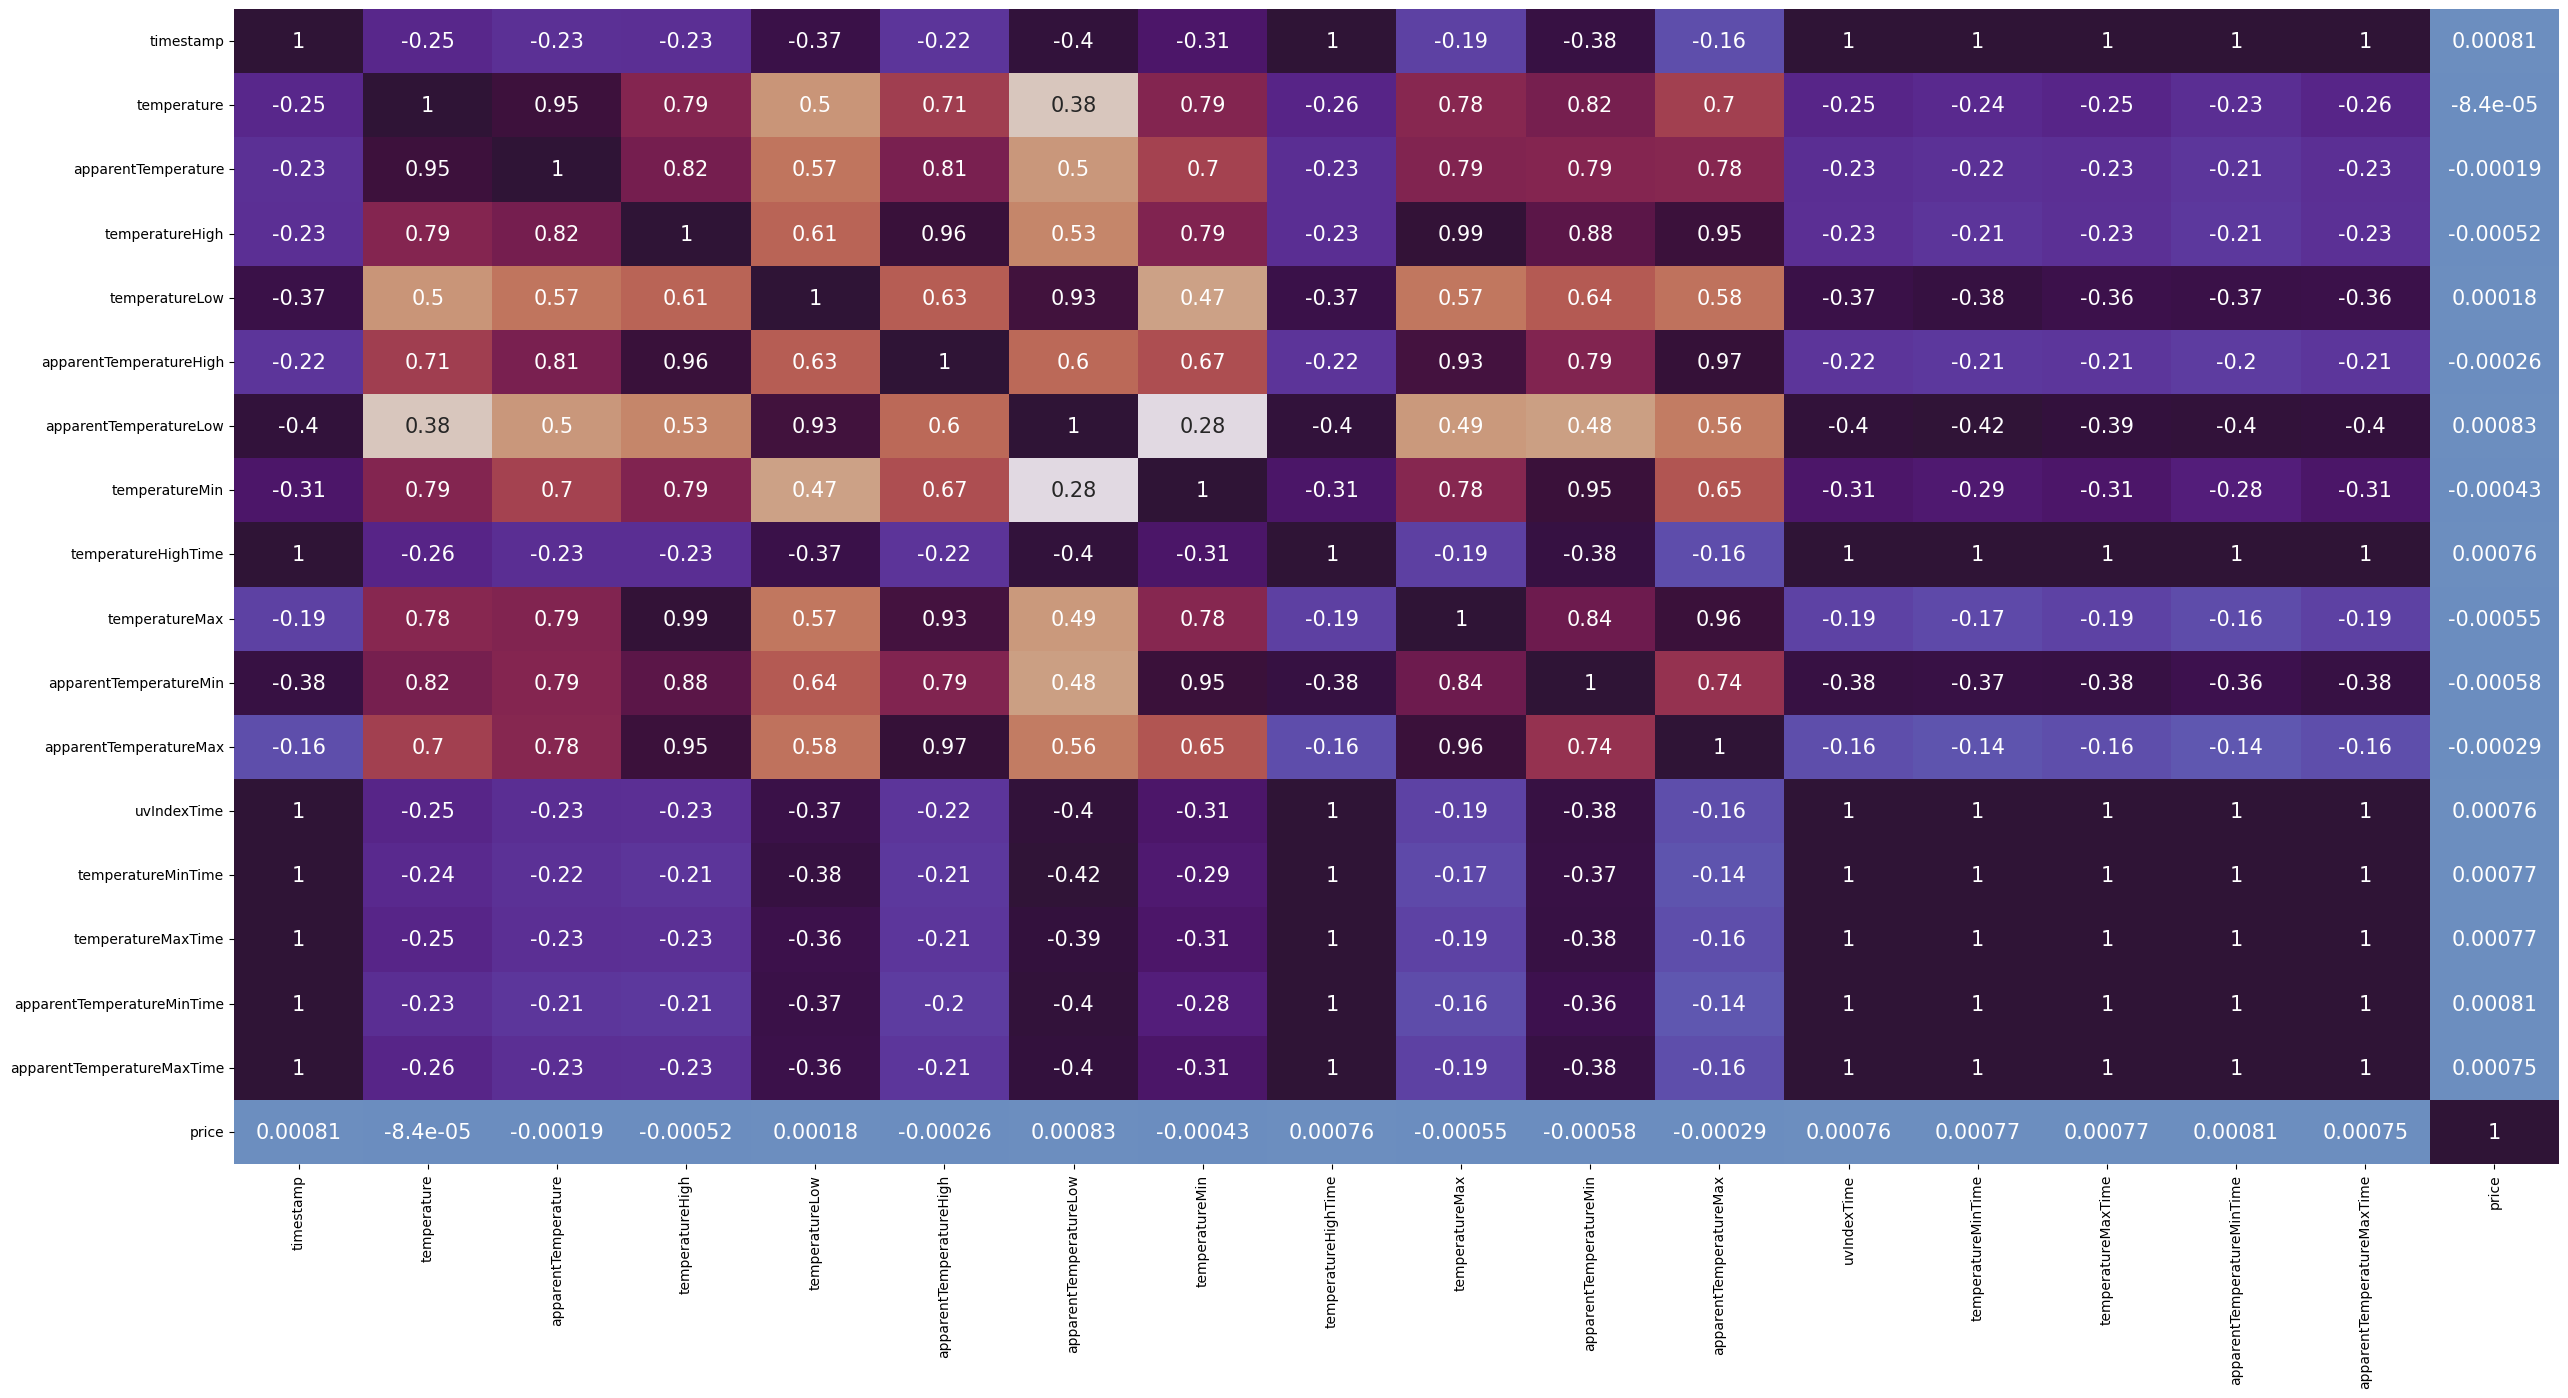

In [ ]:
temp=['timestamp','datetime','long_summary','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
             'uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','price']
plt.figure(figsize=(30,15))
temp_corr=df[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df    

,id,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000


,hour,day,month,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,price
hour,1.000000,0.066090,-0.079379,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,0.000561
day,0.066090,1.000000,-0.861306,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.000722
month,-0.079379,-0.861306,1.000000,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.000913
pressure,-0.067366,-0.444635,0.589609,1.000000,-0.280380,-0.285501,0.004267,0.227912,-0.451178,0.533037,0.532998,-0.528024,-0.243383,0.000866
windBearing,0.036089,0.092167,-0.135103,-0.280380,1.000000,-0.221602,0.114206,0.401978,0.346117,-0.133016,-0.133027,0.262817,-0.555013,-0.001382
cloudCover,0.026525,-0.041190,-0.016800,-0.285501,-0.221602,1.000000,-0.066898,-0.477618,0.042311,-0.080584,-0.080560,0.093997,0.396136,0.000883
uvIndex,0.330209,-0.011885,-0.012321,0.004267,0.114206,-0.066898,1.000000,0.119842,-0.016625,-0.023806,-0.023808,0.055534,-0.040818,-0.000424
visibility.1,0.174129,0.104992,0.011493,0.227912,0.401978,-0.477618,0.119842,1.000000,0.263140,0.152877,0.152864,-0.173903,-0.545052,0.001497
ozone,0.034164,0.377057,-0.149333,-0.451178,0.346117,0.042311,-0.016625,0.263140,1.000000,0.194382,0.194421,-0.229931,-0.223173,0.000460
sunriseTime,-0.027537,-0.341068,0.770684,0.533037,-0.133016,-0.080584,-0.023806,0.152877,0.194382,1.000000,1.000000,-0.844637,-0.210650,0.000760


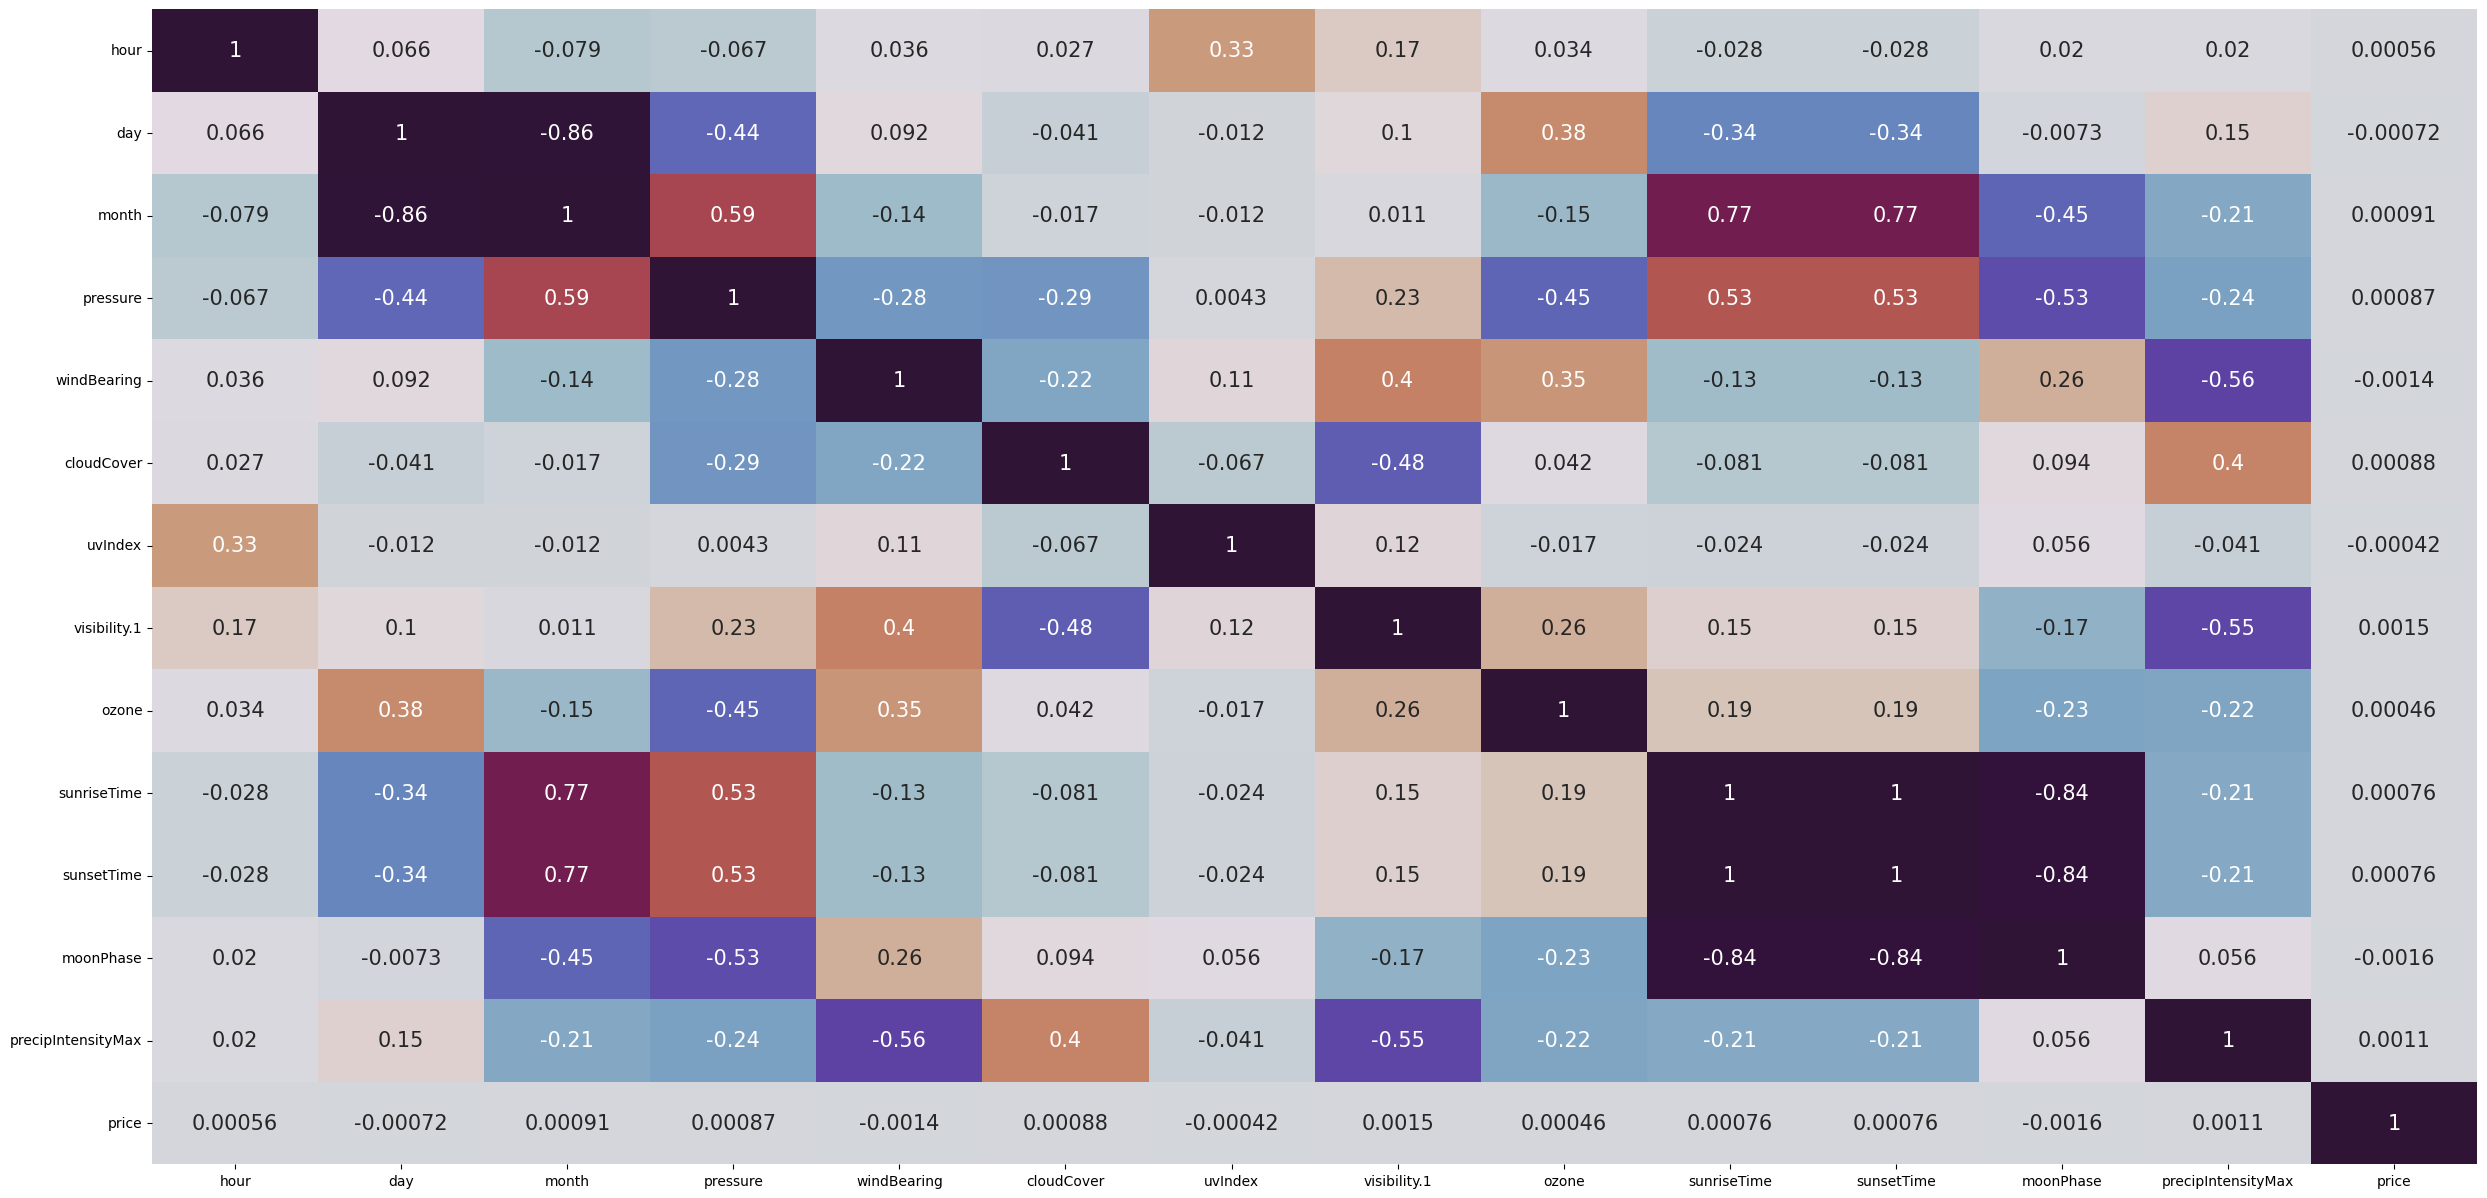

In [ ]:
temp=['hour','day','month','pressure','windBearing','cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase','precipIntensityMax','price']
plt.figure(figsize=(30,15))
temp_corr=df[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,...,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,icon,dewPoint
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,...,0.68,8.66,9.17,1545015600,10.000,1545048000,1544968800,1545044400,partly-cloudy-night,32.70
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,...,0.94,11.98,11.98,1543291200,4.786,1543298400,1543251600,1543291200,rain,41.83
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,...,0.75,7.33,7.33,1543334400,10.000,1543402800,1543320000,1543392000,clear-night,31.10
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,...,0.73,5.28,5.28,1543514400,10.000,1543579200,1543510800,1543575600,clear-night,26.64
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,...,0.70,9.14,9.14,1543446000,10.000,1543478400,1543420800,1543460400,partly-cloudy-night,28.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65


,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,dewPoint,latitude,price
humidity,1.000000,-0.207223,-0.306439,-0.159006,-0.697820,-0.164756,-0.162622,-0.161642,0.747336,-0.117481,-0.001238
windSpeed,-0.207223,1.000000,0.937638,-0.070913,-0.035520,-0.060080,-0.072762,-0.064934,-0.075004,-0.097139,0.000990
windGust,-0.306439,0.937638,1.000000,0.000497,0.038831,0.012889,0.000975,0.007643,-0.175517,0.024309,0.001218
windGustTime,-0.159006,-0.070913,0.000497,1.000000,0.152486,0.998968,0.999163,0.999034,-0.259949,0.172625,0.000851
visibility,-0.697820,-0.035520,0.038831,0.152486,1.000000,0.152967,0.155511,0.151688,-0.579915,0.124166,0.001497
temperatureLowTime,-0.164756,-0.060080,0.012889,0.998968,0.152967,1.000000,0.999684,0.999961,-0.267695,0.171193,0.000754
apparentTemperatureHighTime,-0.162622,-0.072762,0.000975,0.999163,0.155511,0.999684,1.000000,0.999710,-0.269586,0.173299,0.000741
apparentTemperatureLowTime,-0.161642,-0.064934,0.007643,0.999034,0.151688,0.999961,0.999710,1.000000,-0.265453,0.172571,0.000761
dewPoint,0.747336,-0.075004,-0.175517,-0.259949,-0.579915,-0.267695,-0.269586,-0.265453,1.000000,-0.130234,-0.000615
latitude,-0.117481,-0.097139,0.024309,0.172625,0.124166,0.171193,0.173299,0.172571,-0.130234,1.000000,0.002088


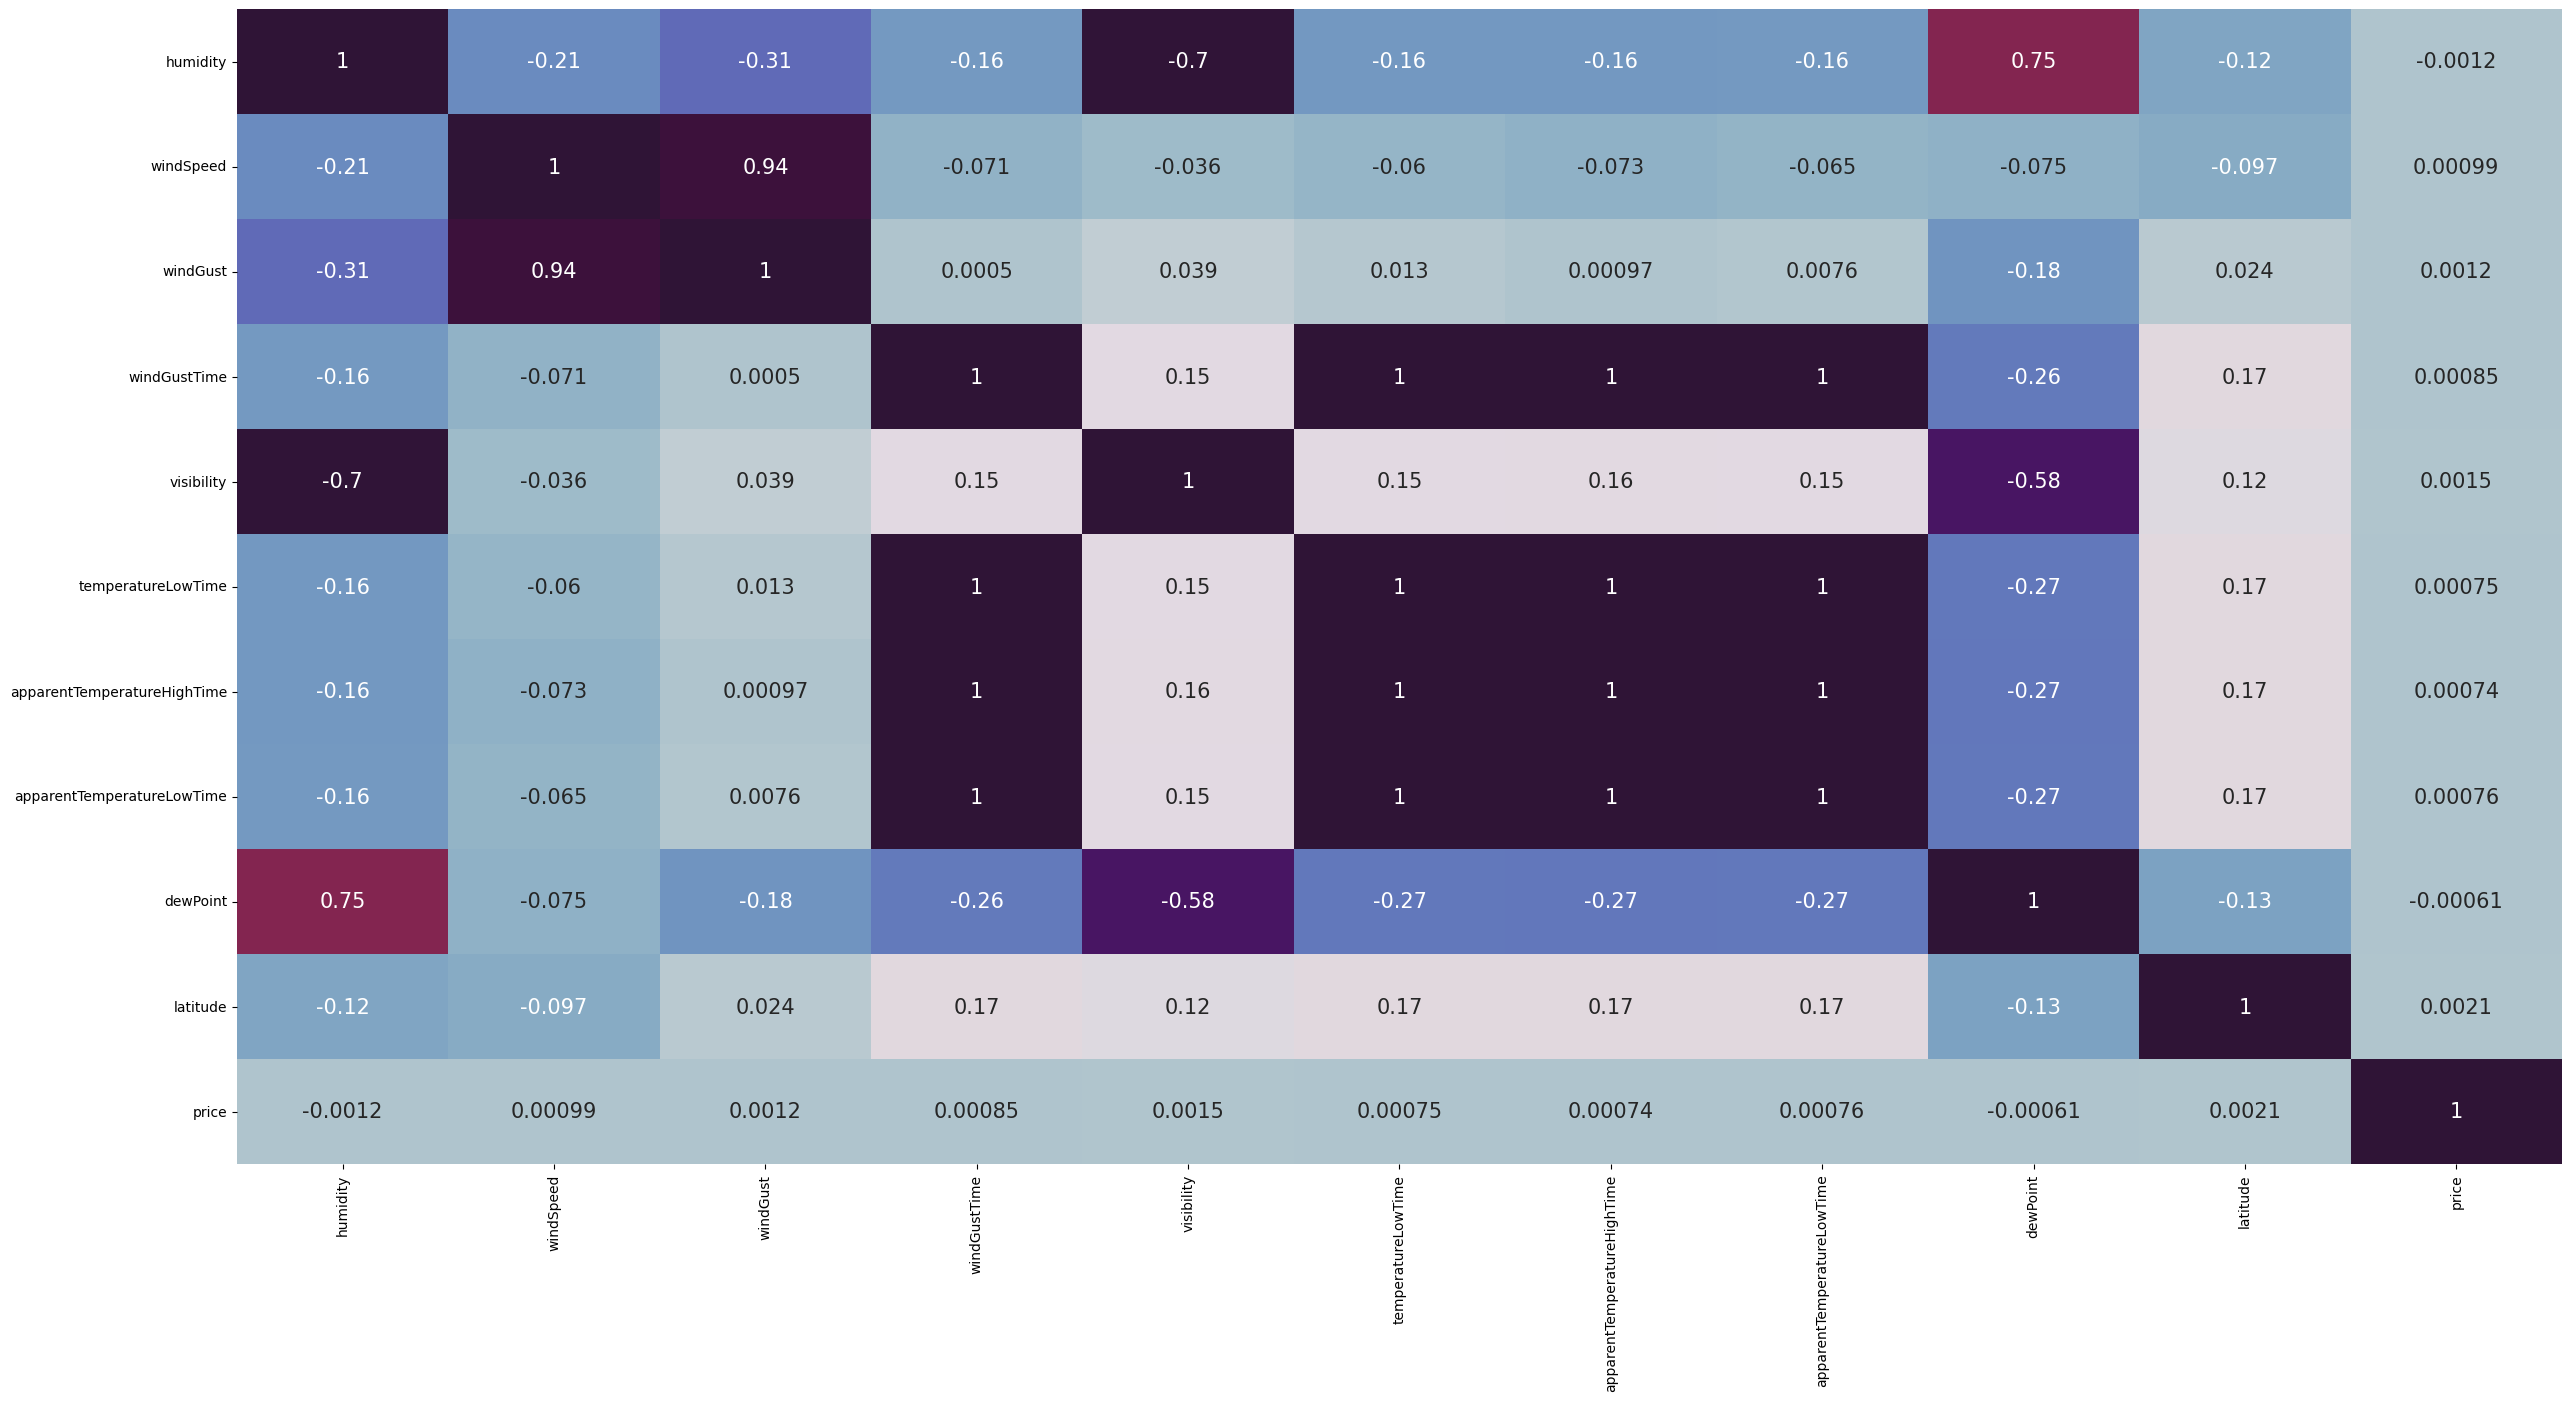

In [ ]:
temp=['humidity','windSpeed','windGust','windGustTime','visibility','temperatureLowTime','apparentTemperatureHighTime',
      'apparentTemperatureLowTime','dewPoint','latitude','price']
plt.figure(figsize=(30,15))
temp_corr=df[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,longitude,short_summary,precipIntensity,precipProbability,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,-71.0330,Mostly Cloudy,0.0000,0.0,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,-71.0330,Rain,0.1299,1.0,rain
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,-71.0330,Clear,0.0000,0.0,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,-71.0330,Clear,0.0000,0.0,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,-71.0330,Partly Cloudy,0.0000,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night


,precipIntensity,precipProbability,longitude,price
precipIntensity,1.000000,0.838470,0.130840,0.000166
precipProbability,0.838470,1.000000,0.122355,-0.000243
longitude,0.130840,0.122355,1.000000,-0.001417
price,0.000166,-0.000243,-0.001417,1.000000


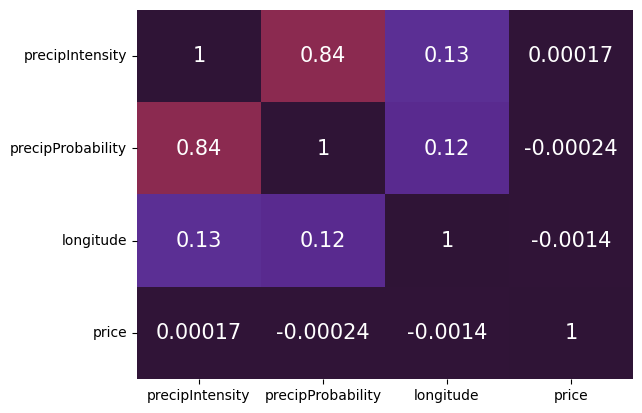

In [ ]:
temp=['precipIntensity','precipProbability','longitude','price']
sns.heatmap(df[temp].corr(),annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
df[temp].corr()

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,Partly Cloudy,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,Partly Cloudy,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,Partly Cloudy,partly-cloudy-night


In [ ]:
df2 = df.drop(['id','timezone','source','destination','icon','product_id','short_summary'], axis = 1)

In [ ]:
df2.dropna()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...
693065,Uber,WAV,9.5,1.00,1.0
693066,Uber,UberXL,13.0,1.00,1.0
693067,Uber,UberX,9.5,1.00,1.0
693069,Uber,Black SUV,27.0,1.00,1.0


# Data Preprocessing

In [ ]:
df3 = pd.get_dummies(df2)
df3

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,13.0,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
693067,9.5,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
693068,NaN,1.00,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
693069,27.0,1.00,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = df3.dropna()

In [ ]:
df3

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
693066,13.0,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
693067,9.5,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
693069,27.0,1.00,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df3.drop(columns = 'price')
y = df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Pendefinisian Model

Linear Regression merupakan algoritma umum dan sederhana yang dapat digunakan untuk melakukan prediksi. Konsep Linear Regression yakni dengan memprediksi satu variabel target berdasarkan variabel lainnya. Kita memilih metode Linear Regression karena sesuai dengan target dari projek ini dibuat yaitu memprediksi harga. Parameter yang kita pakai yakni sesuai dengan default dari library sklearn.


Formula untuk regresi linear adalah sebagai berikut :


In [ ]:
display(Math(r'y = \beta_0 + \beta_1 x + \varepsilon'))


<IPython.core.display.Math object>

y mewakili variabel dependen.

x mewakili variabel independen.

β₀ adalah intercept y (koefisien dari istilah konstan).

β₁ adalah kemiringan (koefisien dari x).

ε mewakili istilah kesalahan.

In [ ]:
model = LinearRegression()

# Pelatihan Model

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Evaluasi Model

In [ ]:
print(f'MAE dari model Linear Regression adalah {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE dari model Linear Regression adalah {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2 dari model Linear Regression adalah {r2_score(y_test, y_pred)}')

MAE dari model Linear Regression adalah 1.773559956071586
MAPE dari model Linear Regression adalah 0.13421532390275315
R2 dari model Linear Regression adalah 0.927803518152137


# Model Inference

In [ ]:
X_to_test = df2.copy()

In [ ]:
to_inference = [
    {
        "price": 12.25,
        "distance": 4.2,
        "surge_multiplier": 1.0,
        "cab_type": "Uber",
        "name": "UberX"
    },
    {
        "price": 10.75,
        "distance": 6.8,
        "surge_multiplier": 1.0,
        "cab_type": "Uber",
        "name": "UberPool"
    },
    {
        "price": 15.00,
        "distance": 3.5,
        "surge_multiplier": 1.1,
        "cab_type": "Uber",
        "name": "Black SUV"
    },
    {
        "price": 19.75,
        "distance": 3.5,
        "surge_multiplier": 1.3,
        "cab_type": "Lyft",
        "name": "Lux"
    }
]

In [ ]:
pd.DataFrame(to_inference)

,price,distance,surge_multiplier,cab_type,name
0,12.25,4.2,1.0,Uber,UberX
1,10.75,6.8,1.0,Uber,UberPool
2,15.00,3.5,1.1,Uber,Black SUV
3,19.75,3.5,1.3,Lyft,Lux


In [ ]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [ ]:
X_to_test

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.00,0.44,1.0
1,Lyft,Lux,11.00,0.44,1.0
2,Lyft,Lyft,7.00,0.44,1.0
3,Lyft,Lux Black XL,26.00,0.44,1.0
4,Lyft,Lyft XL,9.00,0.44,1.0
...,...,...,...,...,...
693070,Uber,UberPool,10.00,1.00,1.0
693071,Uber,UberX,12.25,4.20,1.0
693072,Uber,UberPool,10.75,6.80,1.0
693073,Uber,Black SUV,15.00,3.50,1.1


In [ ]:
X_to_test = pd.get_dummies(X_to_test)
X_to_test = X_to_test[-2:]
X_to_test

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
693073,15.00,3.5,1.1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
693074,19.75,3.5,1.3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_to_test = X_to_test.drop(columns = 'price')

In [ ]:
price = model.predict(X_to_test)

In [ ]:
price

array([35.77980227, 26.25909506])

# Kesimpulan

* Terdapat missing value pada variabel price yakni sekitar 8%.
* Fitur yang digunakan pada projek ini yaitu fitur source, destination, cab_type, name, distance, surge_multiplier serta fitur price sebagai fitur target.
* Untuk memprediksi harga (fitur target) pada projek ini menggunakan metode yaitu Linear Regression.
* Evaluasi model menggunakan MAE, MAPE, dan R2. Metode Linear Regression yang digunakan untuk dataset ini memperoleh hasil R2 sebesar 0.92 atau 92%, dapat dikatakan bahwa metode ini menghasilkan akurasi yang cukup tinggi.